In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data_train = pd.read_csv('C:\\Users\\LavaN-32428068\\Desktop\\python test\\data of mobile-price\\train.csv')
data_test = pd.read_csv('C:\\Users\\LavaN-32428068\\Desktop\\python test\\data of mobile-price\\test.csv')
df_train = pd.DataFrame(data_train)
df_test = pd.DataFrame(data_test)
data_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [3]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [64]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1000.0,500.5000,288.819436,1.0,250.75,500.5,750.25,1000.0
battery_power,1000.0,1248.5100,432.458227,500.0,895.00,1246.5,1629.25,1999.0
blue,1000.0,0.5160,0.499994,0.0,0.00,1.0,1.00,1.0
clock_speed,1000.0,1.5409,0.829268,0.5,0.70,1.5,2.30,3.0
dual_sim,1000.0,0.5170,0.499961,0.0,0.00,1.0,1.00,1.0
fc,1000.0,4.5930,4.463325,0.0,1.00,3.0,7.00,19.0
four_g,1000.0,0.4870,0.500081,0.0,0.00,0.0,1.00,1.0
int_memory,1000.0,33.6520,18.128694,2.0,18.00,34.5,49.00,64.0
m_dep,1000.0,0.5175,0.280861,0.1,0.30,0.5,0.80,1.0
mobile_wt,1000.0,139.5110,34.851550,80.0,109.75,139.0,170.00,200.0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
df_train['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

In [7]:
df_train['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

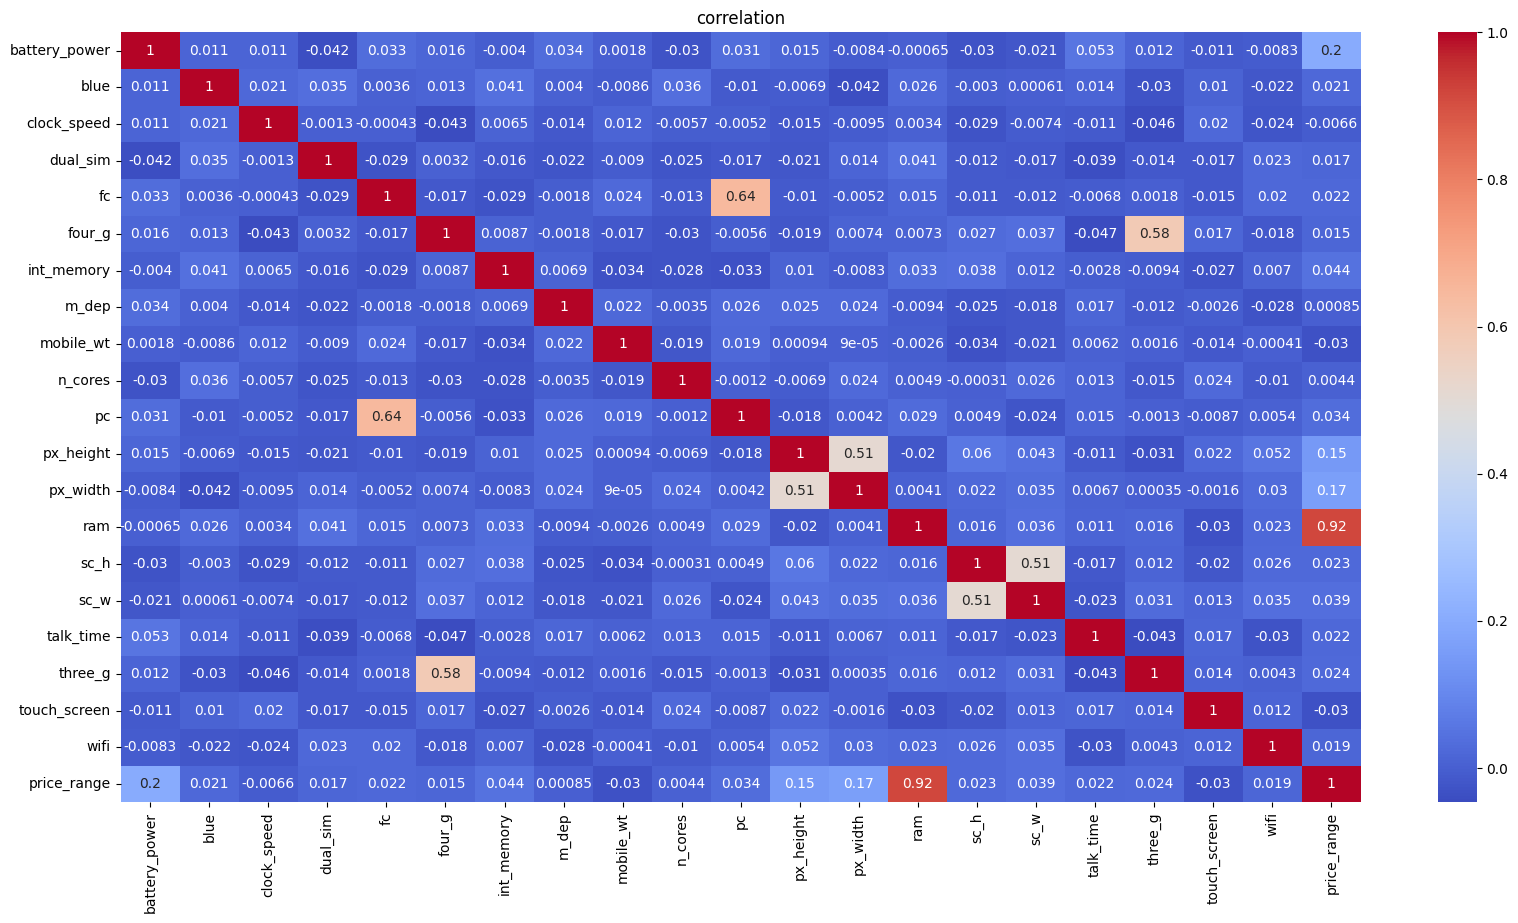

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(df_train.corr() ,  annot=True, cmap="coolwarm")
plt.title('correlation')
plt.show()

ram>battery_power>px_width>px_height>....

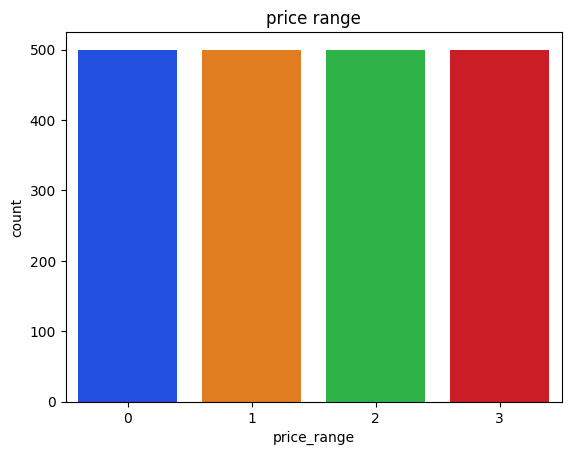

In [9]:
sns.countplot(x=df_train['price_range'],palette="bright")
plt.title('price range');

In [10]:
list(df_train.columns)

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

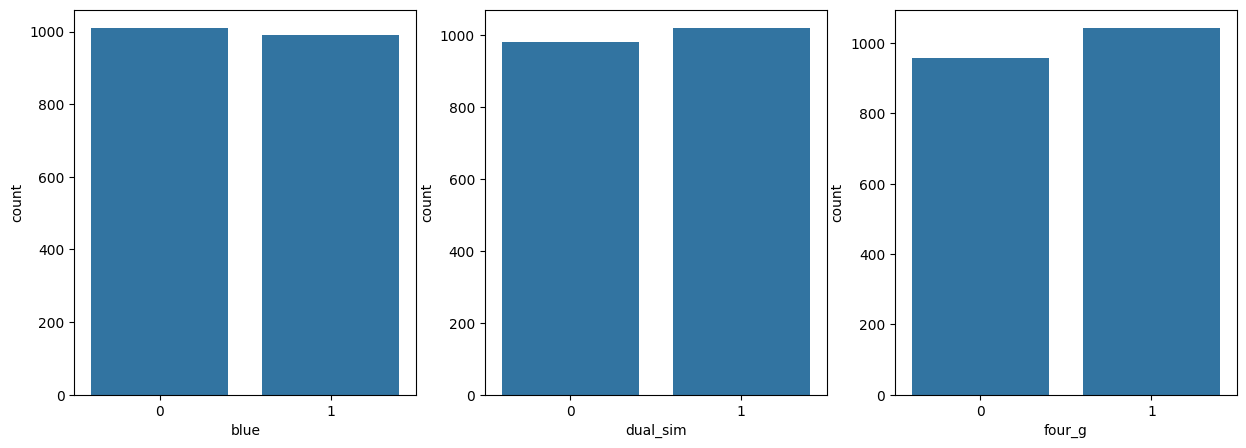

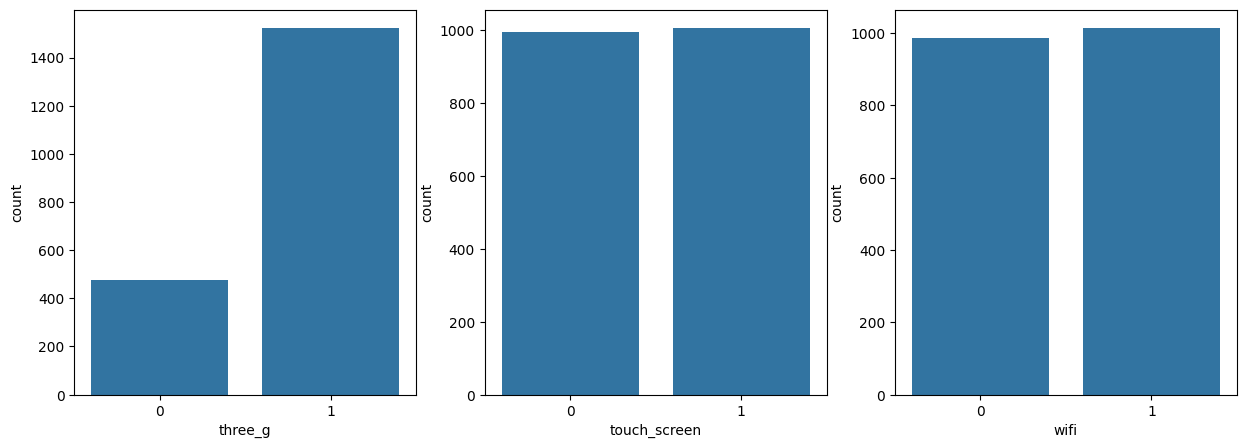

In [11]:
category = ['blue','dual_sim','four_g','three_g','touch_screen','wifi']
i=0
while i <6:
    fig = plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    sns.countplot(x = category[i] , data=df_train)
    i+=1
    plt.subplot(1,3,2)
    sns.countplot(x=category[i],data=df_train)
    i+=1
    plt.subplot(1,3,3)
    sns.countplot(x=category[i],data=df_train)
    plt.show()
    i+=1

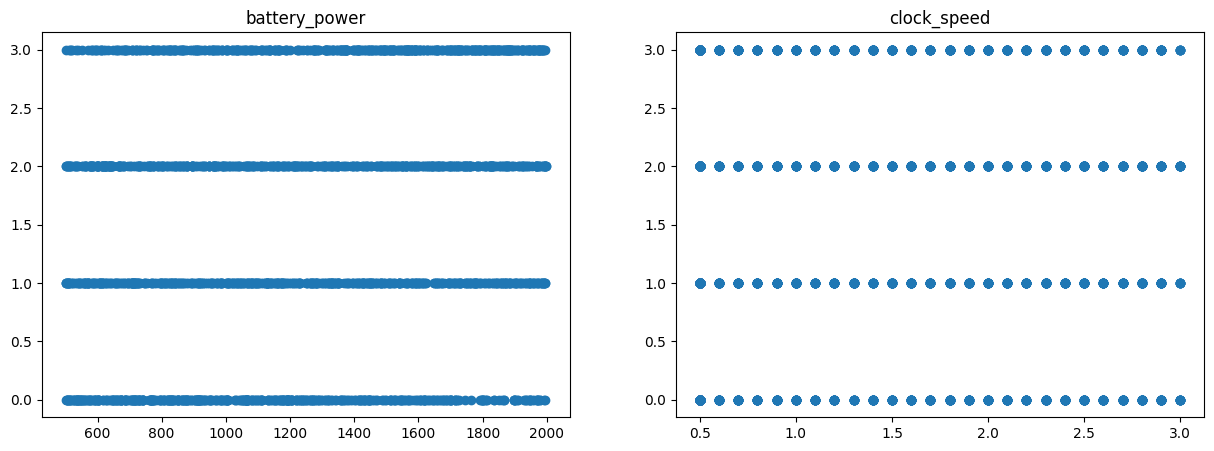

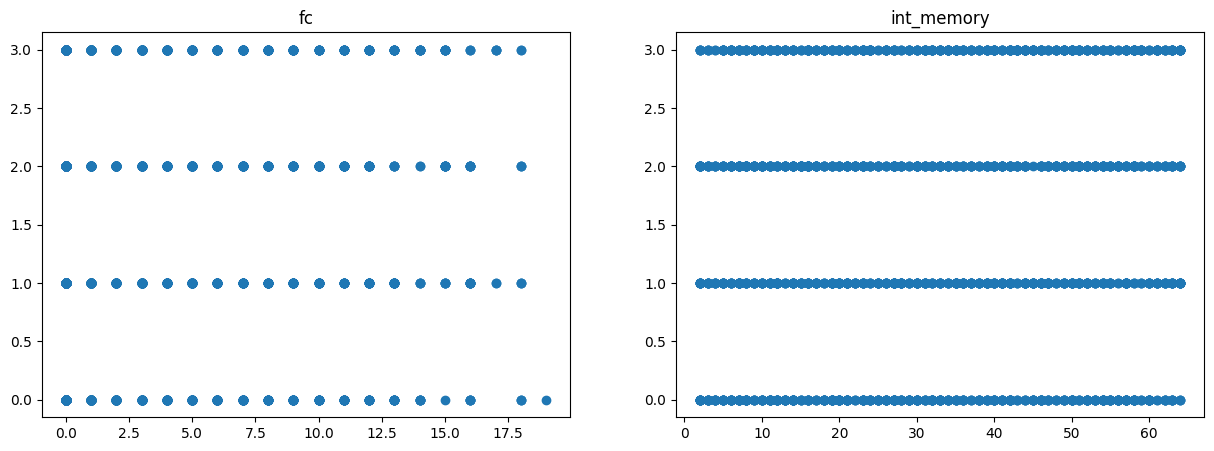

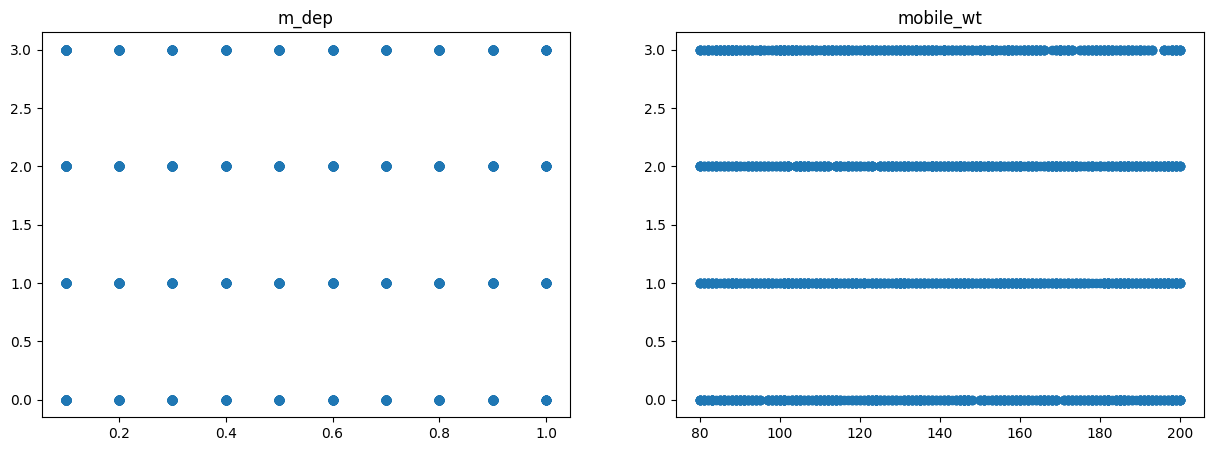

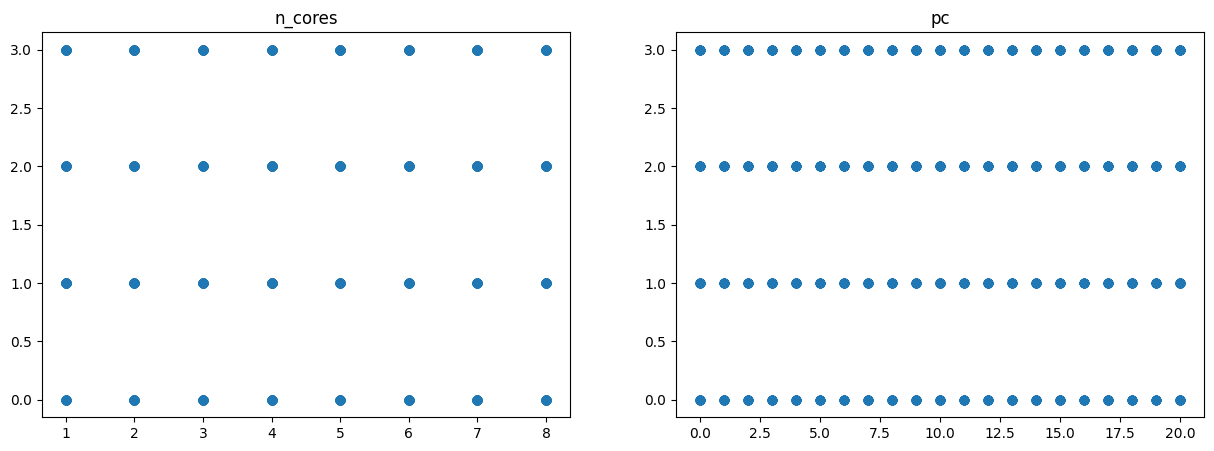

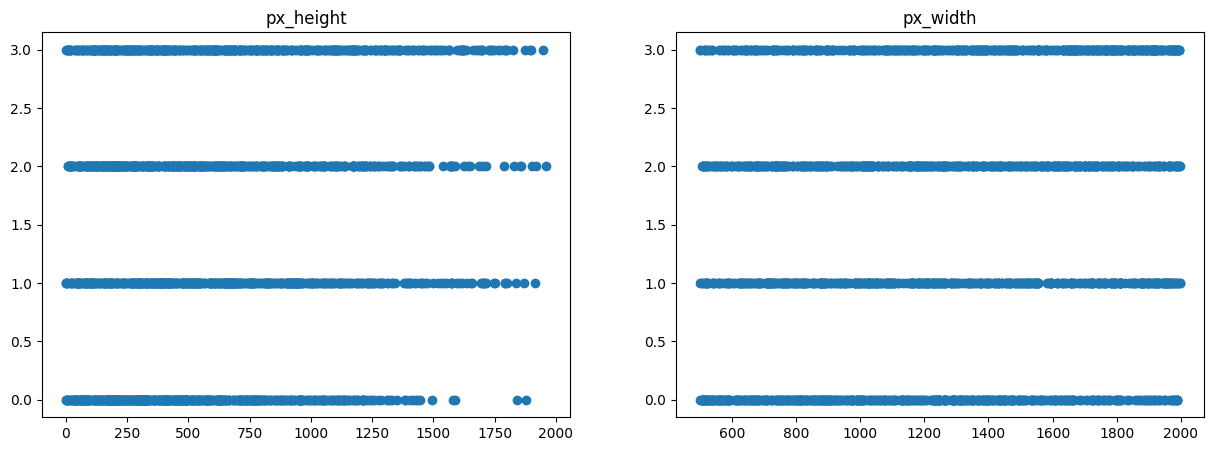

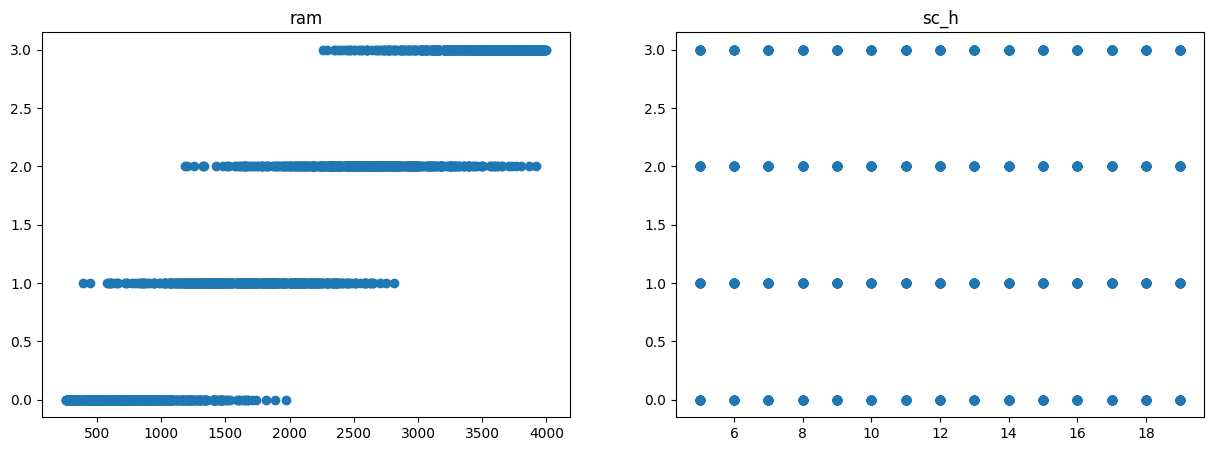

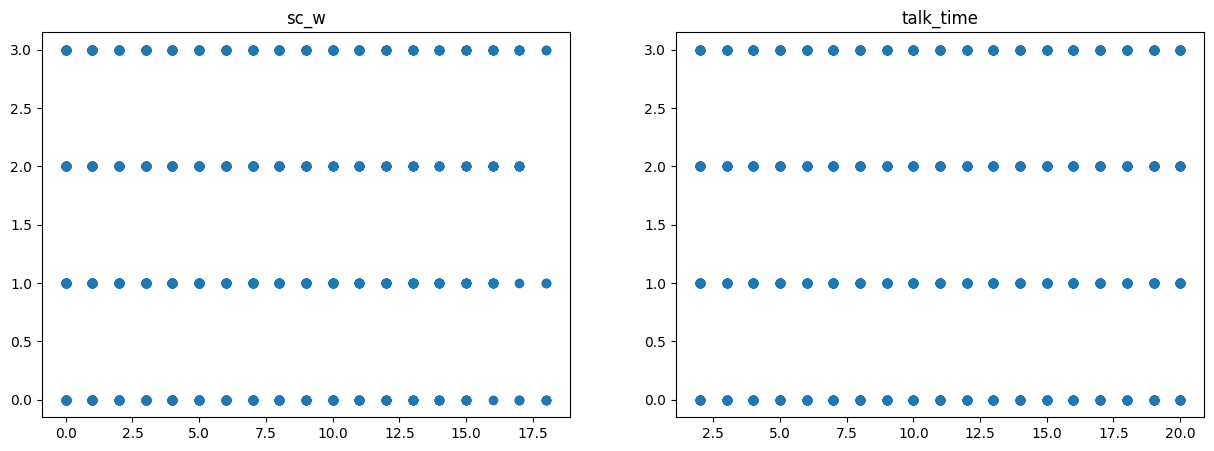

In [12]:
category = ['battery_power','clock_speed','fc',
            'int_memory','m_dep','mobile_wt',
            'n_cores','pc','px_height','px_width','ram',
            'sc_h','sc_w','talk_time']
i=0
while i<len(category):
    fig=plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.scatter(x=df_train[category[i]] , y=df_train['price_range'])
    plt.title(category[i])
    i+=1
    plt.subplot(1,2,2)
    plt.scatter(x=df_train[category[i]] , y=df_train['price_range'])
    plt.title(category[i])
    plt.show()
    i+=1

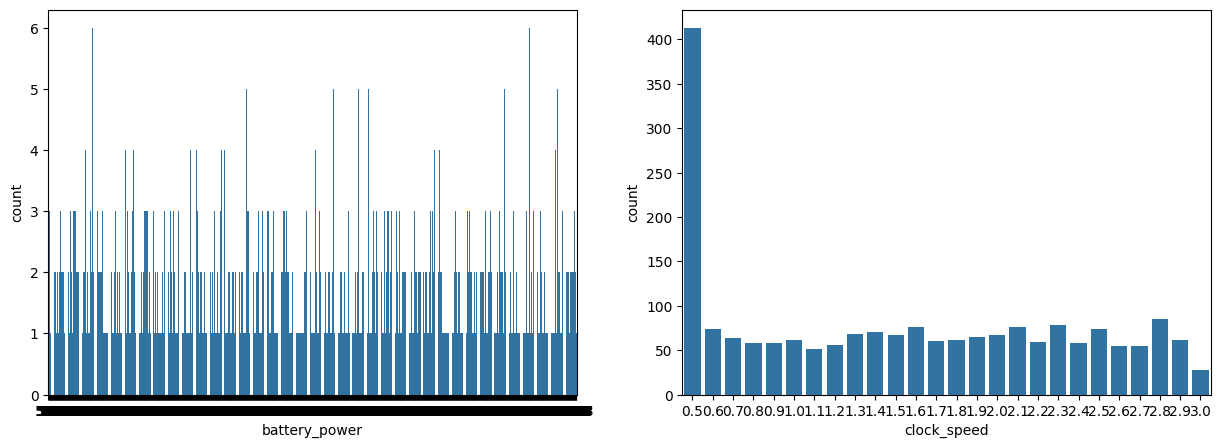

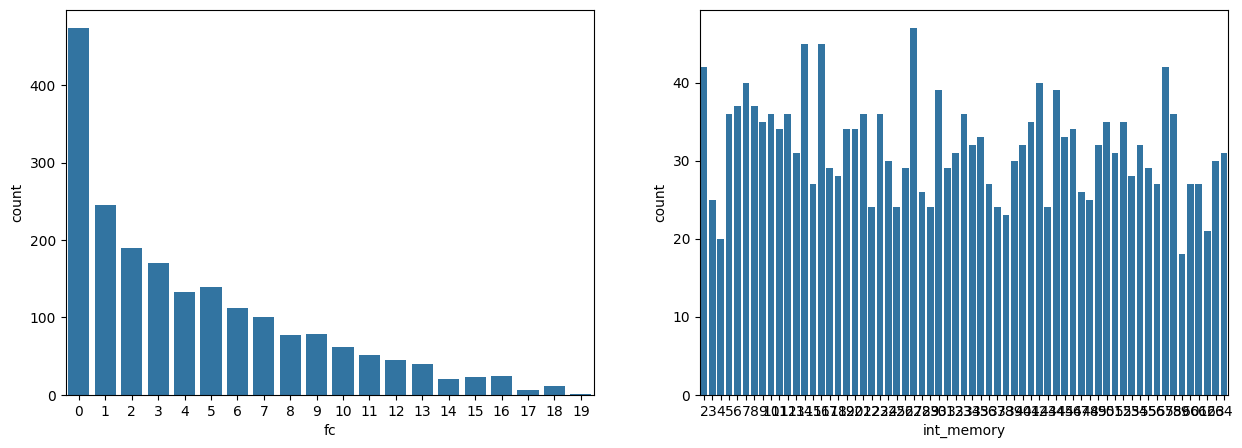

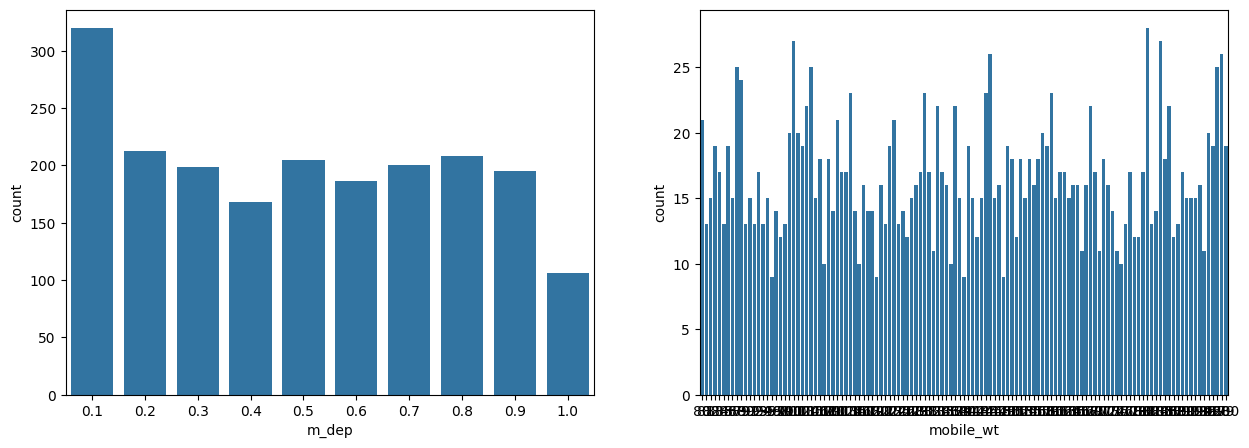

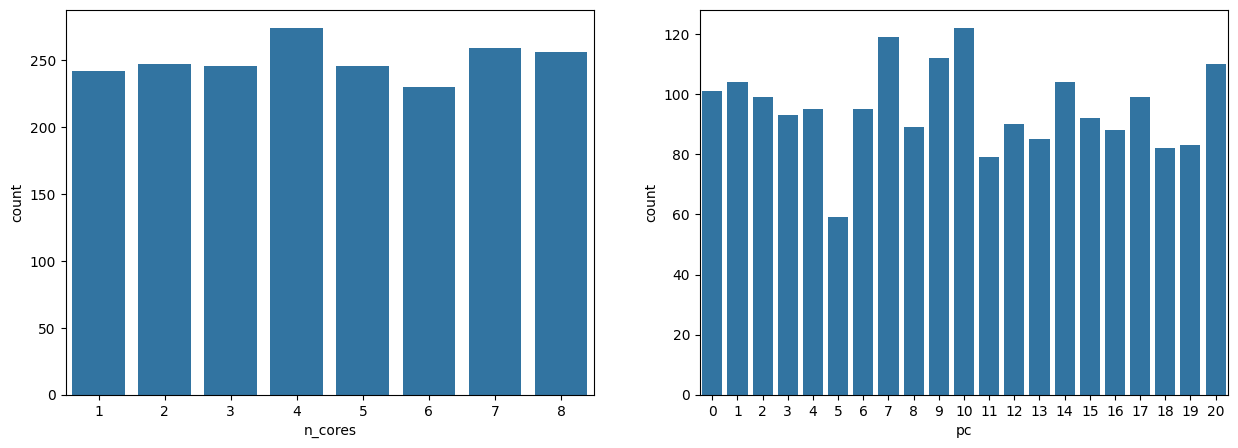

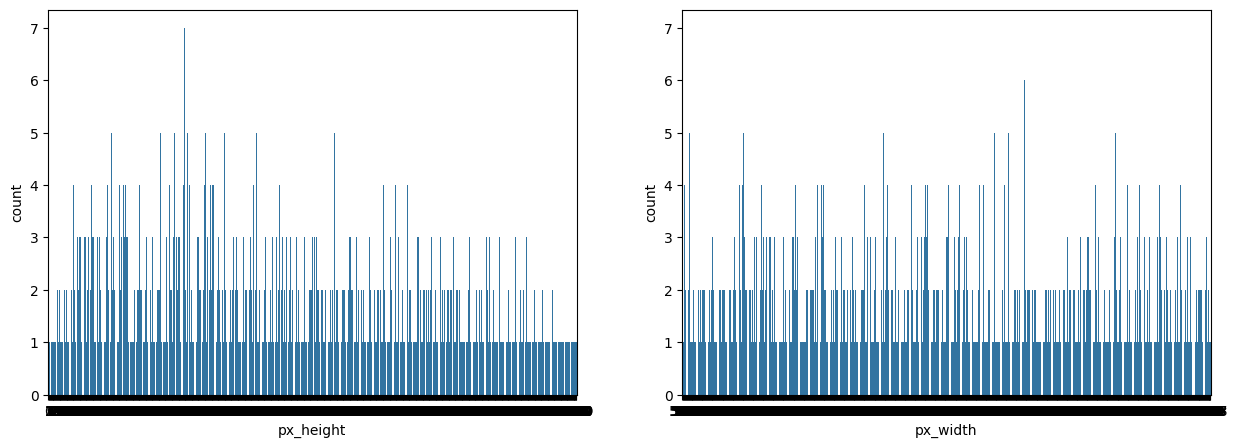

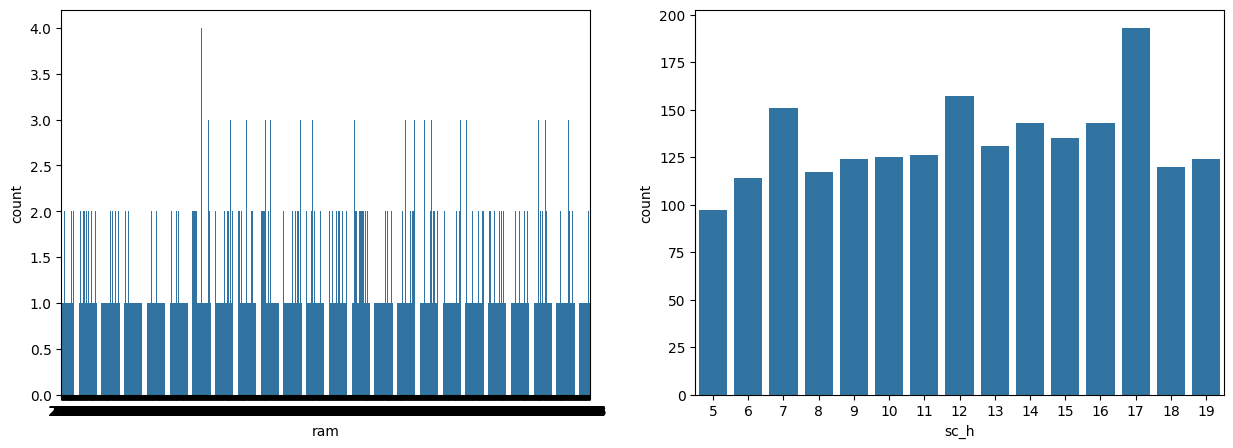

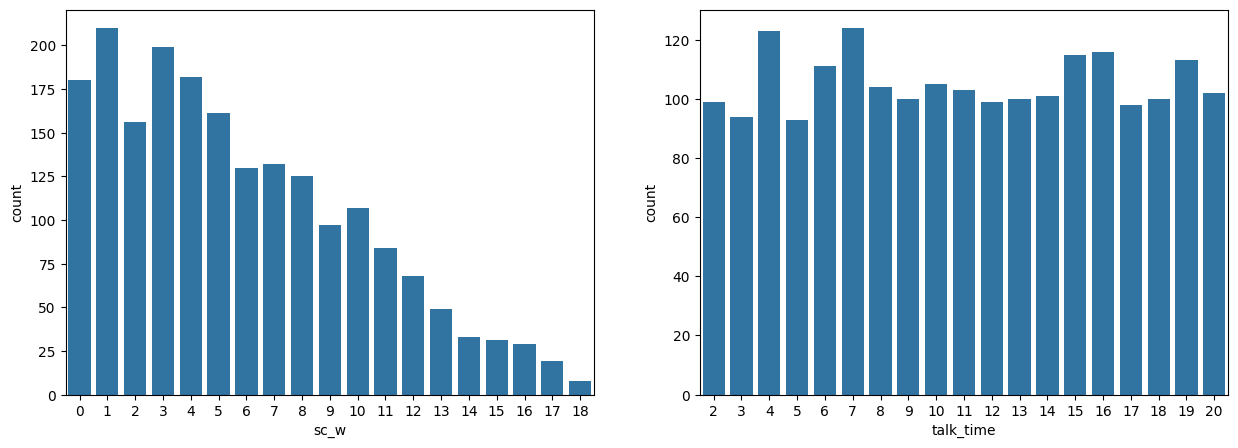

In [13]:
category = ['battery_power','clock_speed','fc',
            'int_memory','m_dep','mobile_wt',
            'n_cores','pc','px_height','px_width','ram',
            'sc_h','sc_w','talk_time']
i=0
while i<14:
    fig = plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.countplot(x = category[i] , data=df_train)
    i+=1
    plt.subplot(1,2,2)
    sns.countplot(x=category[i],data=df_train)
    i+=1
    plt.show()
    

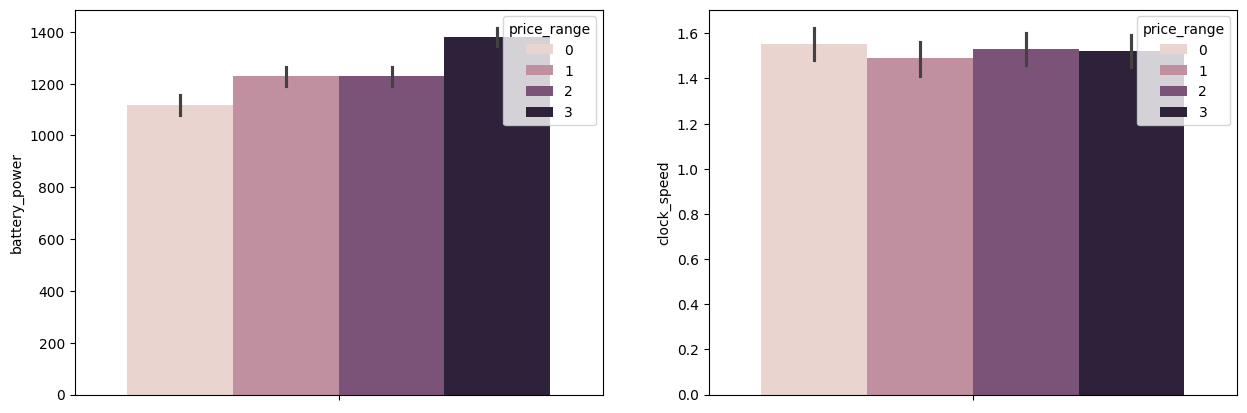

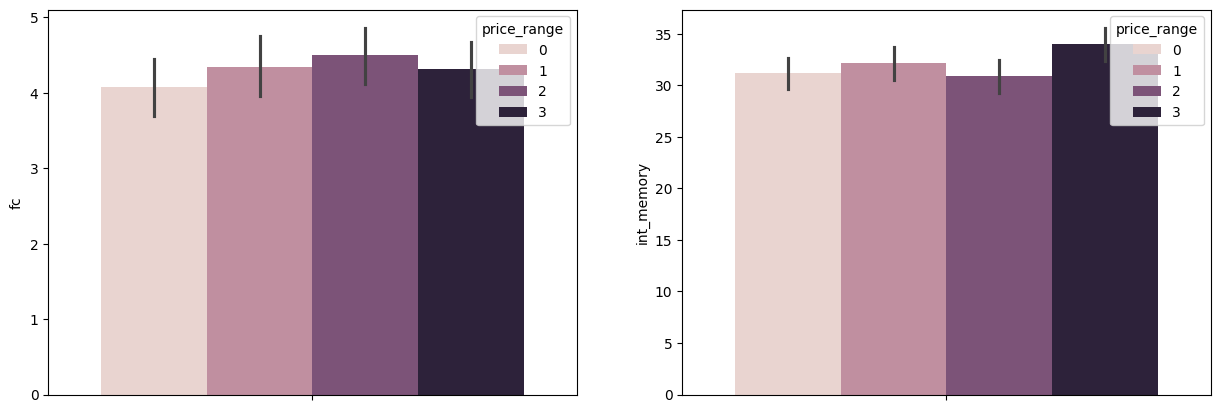

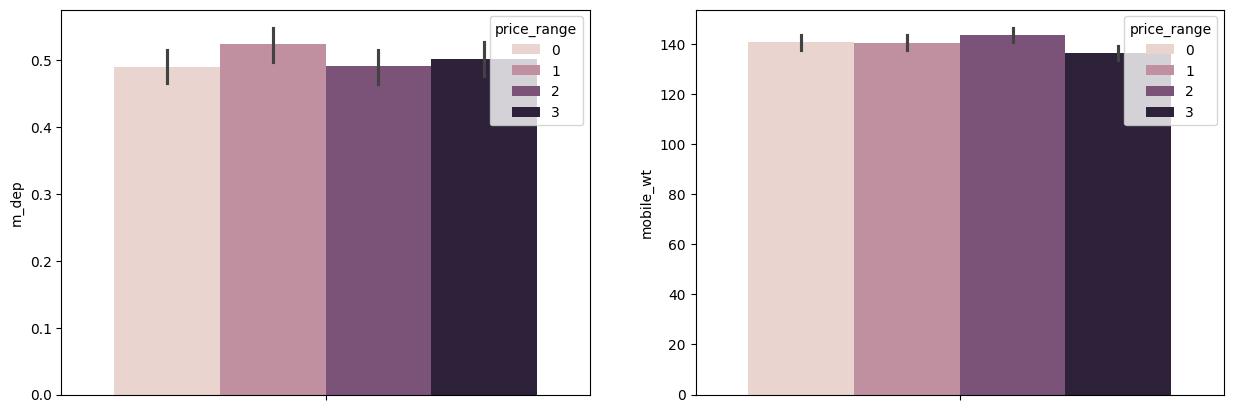

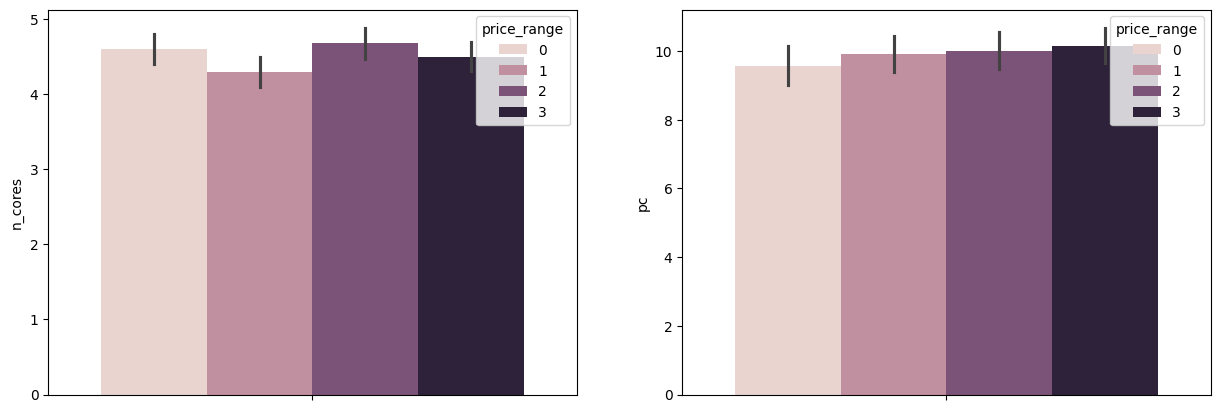

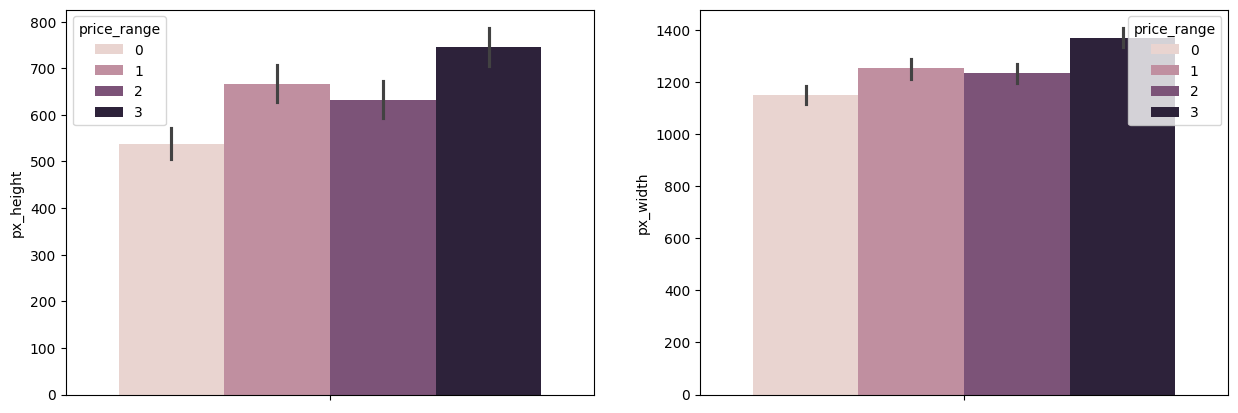

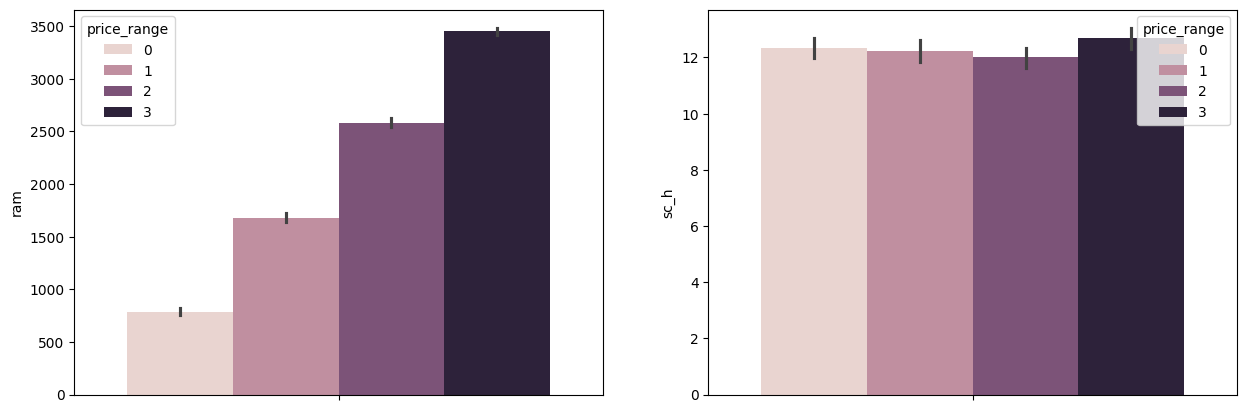

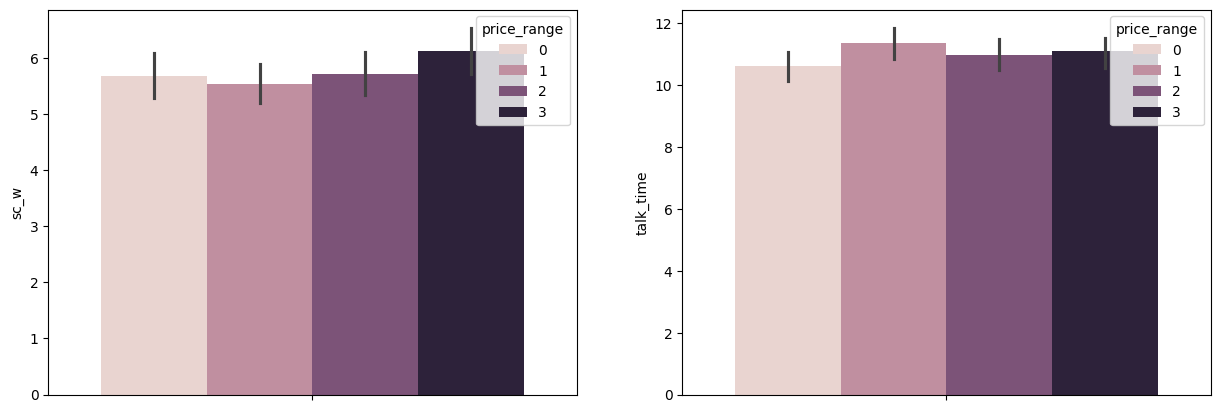

In [14]:
category = ['battery_power','clock_speed','fc',
            'int_memory','m_dep','mobile_wt',
            'n_cores','pc','px_height','px_width','ram',
            'sc_h','sc_w','talk_time']
i=0
while i<14:
    fig = plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.barplot(y = category[i] ,hue=df_train['price_range'], data=df_train)
    i+=1
    plt.subplot(1,2,2)
    sns.barplot(y=category[i],hue=df_train['price_range'] ,data=df_train)
    i+=1
    plt.show()
    

<Axes: ylabel='battery_power'>

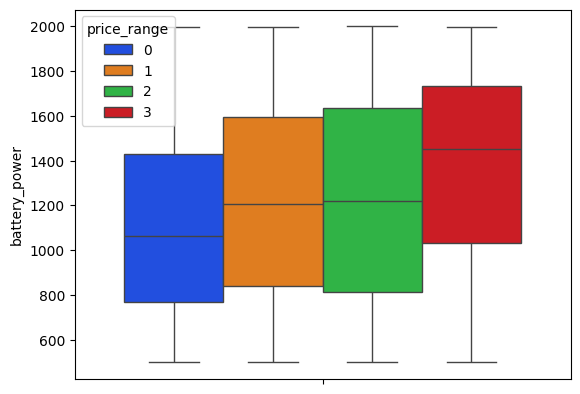

In [15]:
sns.boxplot(y='battery_power' ,hue= 'price_range', data=df_train, palette="bright" )

<Axes: ylabel='ram'>

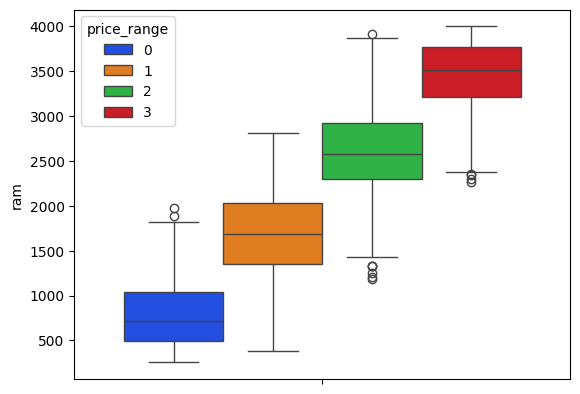

In [16]:
sns.boxplot(y='ram' ,hue= 'price_range', data=df_train,palette="bright")

# ML

In [17]:
def run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
    models = {
        "LogisticRegression": LogisticRegression(),
        "SVC": SVC(),
        "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42 ),
        "RandomForestClassifier": RandomForestClassifier(random_state=42),
        "KNeighborsClassifier": KNeighborsClassifier(),
    }

    
    model_performance = []

    for name, model in models.items():
        model.fit(X_train_scaled, y_train_encoded)
        predictions = model.predict(X_test_scaled)
        accuracy = metrics.accuracy_score(y_test_encoded, predictions)
        model_performance.append({
            "Model": name,
            "Accuracy": accuracy
        })

    return pd.DataFrame(model_performance)

In [18]:
x = df_train.drop('price_range',axis=1).values
y = df_train['price_range'].values.reshape(-1,1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
models = run_all_models(X_train, X_test, y_train, y_test)
models.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
1,SVC,0.9650
4,KNeighborsClassifier,0.9425
3,RandomForestClassifier,0.8925
2,DecisionTreeClassifier,0.8325
0,LogisticRegression,0.6325


In [20]:
scaler = StandardScaler()
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)
models = run_all_models(X_train_scaled, X_test_scaled, y_train, y_test)
models.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
0,LogisticRegression,0.9750
1,SVC,0.8925
3,RandomForestClassifier,0.8925
2,DecisionTreeClassifier,0.8350
4,KNeighborsClassifier,0.5300


# Decision Tree Classifier

In [21]:
test_size = [0.1 , 0.15, 0.2 , 0.25 , 0.3 , 0.35]
random_state = [0 , 42]
dic = {'test_size' : [] ,'random state':[], 'accuracy' : []}
max_depth = [2,3,4,5,6,7,8,9]
for n in random_state:
    for i in test_size:
        x_train , x_test , y_train , y_test = train_test_split(x,y,test_size= i , random_state=n)
        dts = DecisionTreeClassifier()
        dts.fit(x_train , y_train.ravel())
        y_pred = dts.predict(x_test)
        dic["random state"].append(n)
        dic["test_size"].append(i)
        dic['accuracy'].append(metrics.accuracy_score(y_test , y_pred))   
besti = pd.DataFrame(dic)
print(besti.sort_values(by="accuracy", ascending=False))

    test_size  random state  accuracy
0        0.10             0  0.890000
1        0.15             0  0.846667
4        0.30             0  0.843333
2        0.20             0  0.842500
5        0.35             0  0.830000
7        0.15            42  0.826667
6        0.10            42  0.820000
8        0.20            42  0.820000
11       0.35            42  0.810000
10       0.30            42  0.808333
3        0.25             0  0.808000
9        0.25            42  0.804000


In [67]:
criterion = ['gini', 'entropy', 'log_loss']
dic = {'criterion' :[] , 'max depth':[] , 'accuracy' : []}
max_depth = range(2,21)

for j in criterion:
    for m in max_depth:
        x_train , x_test , y_train , y_test = train_test_split(x,y,test_size= 0.1 , random_state=0)
        dts = DecisionTreeClassifier(criterion=j , max_depth=m)
        dts.fit(x_train , y_train.ravel())
        y_pred = dts.predict(x_test)
        dic['criterion'].append(j)
        dic['max depth'].append(m)
        dic['accuracy'].append(metrics.accuracy_score(y_test , y_pred))   
besti = pd.DataFrame(dic)
print(besti.sort_values(by="accuracy", ascending=False))

   criterion  max depth  accuracy
16      gini         18     0.870
11      gini         13     0.870
14      gini         16     0.865
10      gini         12     0.865
25   entropy          8     0.865
12      gini         14     0.865
43  log_loss          7     0.865
18      gini         20     0.865
29   entropy         12     0.860
13      gini         15     0.860
9       gini         11     0.860
42  log_loss          6     0.860
23   entropy          6     0.860
24   entropy          7     0.860
54  log_loss         18     0.860
37   entropy         20     0.860
17      gini         19     0.860
44  log_loss          8     0.855
32   entropy         15     0.855
8       gini         10     0.855
6       gini          8     0.855
53  log_loss         17     0.855
55  log_loss         19     0.855
45  log_loss          9     0.850
48  log_loss         12     0.850
49  log_loss         13     0.850
52  log_loss         16     0.850
36   entropy         19     0.850
28   entropy  

In [68]:
test_size = [0.1 , 0.15, 0.2 , 0.25 , 0.3 , 0.35]
random_state = [0 , 42]
criterion = ['gini', 'entropy', 'log_loss']
dic = {'test_size' : [] , 'criterion' :[] , 'max depth':[] , 'random state':[], 'accuracy' : []}
max_depth = range(2,21)
for n in random_state:
    for i in test_size:
        for j in criterion:
            for m in max_depth:
                x_train , x_test , y_train , y_test = train_test_split(x,y,test_size= i , random_state=n)
                dts = DecisionTreeClassifier(criterion=j , max_depth=m)
                dts.fit(x_train , y_train.ravel())
                y_pred = dts.predict(x_test)
                dic["random state"].append(n)
                dic["test_size"].append(i)
                dic['criterion'].append(j)
                dic['max depth'].append(m)
                dic['accuracy'].append(metrics.accuracy_score(y_test , y_pred))   
besti = pd.DataFrame(dic)
print(besti.sort_values(by="accuracy", ascending=False))

     test_size criterion  max depth  random state  accuracy
368       0.10   entropy          9            42  0.885000
347       0.10      gini          7            42  0.880000
16        0.10      gini         18             0  0.880000
350       0.10      gini         10            42  0.880000
87        0.15   entropy         13             0  0.876667
..         ...       ...        ...           ...       ...
457       0.20      gini          3            42  0.740000
514       0.25      gini          3            42  0.740000
114       0.20      gini          2             0  0.735000
228       0.30      gini          2             0  0.735000
285       0.35      gini          2             0  0.731429

[684 rows x 5 columns]


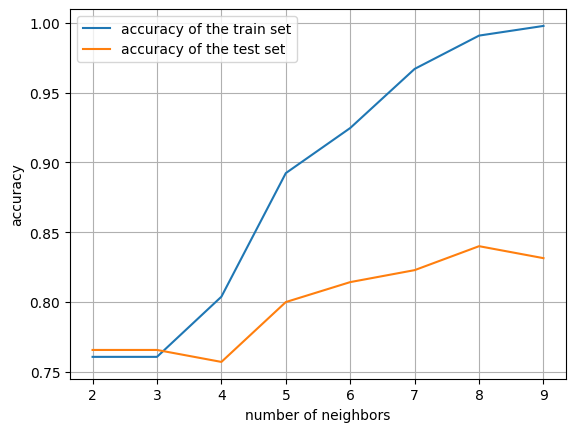

In [24]:
train_acc = []
test_acc = []
neighbors_setting = range(2,10)
for i in neighbors_setting:
    dts = DecisionTreeClassifier(criterion='entropy' , max_depth=i)
    dts.fit(x_train , y_train.ravel())
    train_acc.append(dts.score(x_train,y_train))
    test_acc.append(dts.score(x_test,y_test))
plt.plot(neighbors_setting , train_acc , label = 'accuracy of the train set')
plt.plot(neighbors_setting , test_acc , label = 'accuracy of the test set')
plt.ylabel('accuracy')
plt.xlabel('number of neighbors')
plt.grid()
plt.legend()

In [69]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size= 0.1 , random_state=42)
dts = DecisionTreeClassifier(criterion='gini' , max_depth=7)
dts.fit(x_train , y_train.ravel())
y_pred = dts.predict(x_test)

In [70]:
print('mean_absolute_error : ' , metrics.mean_absolute_error(y_test , y_pred))
print('mean_squared_error : ' , metrics.mean_squared_error(y_test , y_pred))
print('RMSE : ' ,np.sqrt(metrics.mean_squared_error(y_test , y_pred)) )
print('r2_score : ', metrics.r2_score(y_test , y_pred))
print ('accuracy :' , metrics.accuracy_score(y_test , y_pred))

mean_absolute_error :  0.13
mean_squared_error :  0.13
RMSE :  0.36055512754639896
r2_score :  0.9
accuracy : 0.87


In [47]:
dts.classes_

array([0, 1, 2, 3], dtype=int64)

# visulization

In [48]:
feature_names = list(df_train.columns)
feature_names.pop(-1)
feature_names

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi']

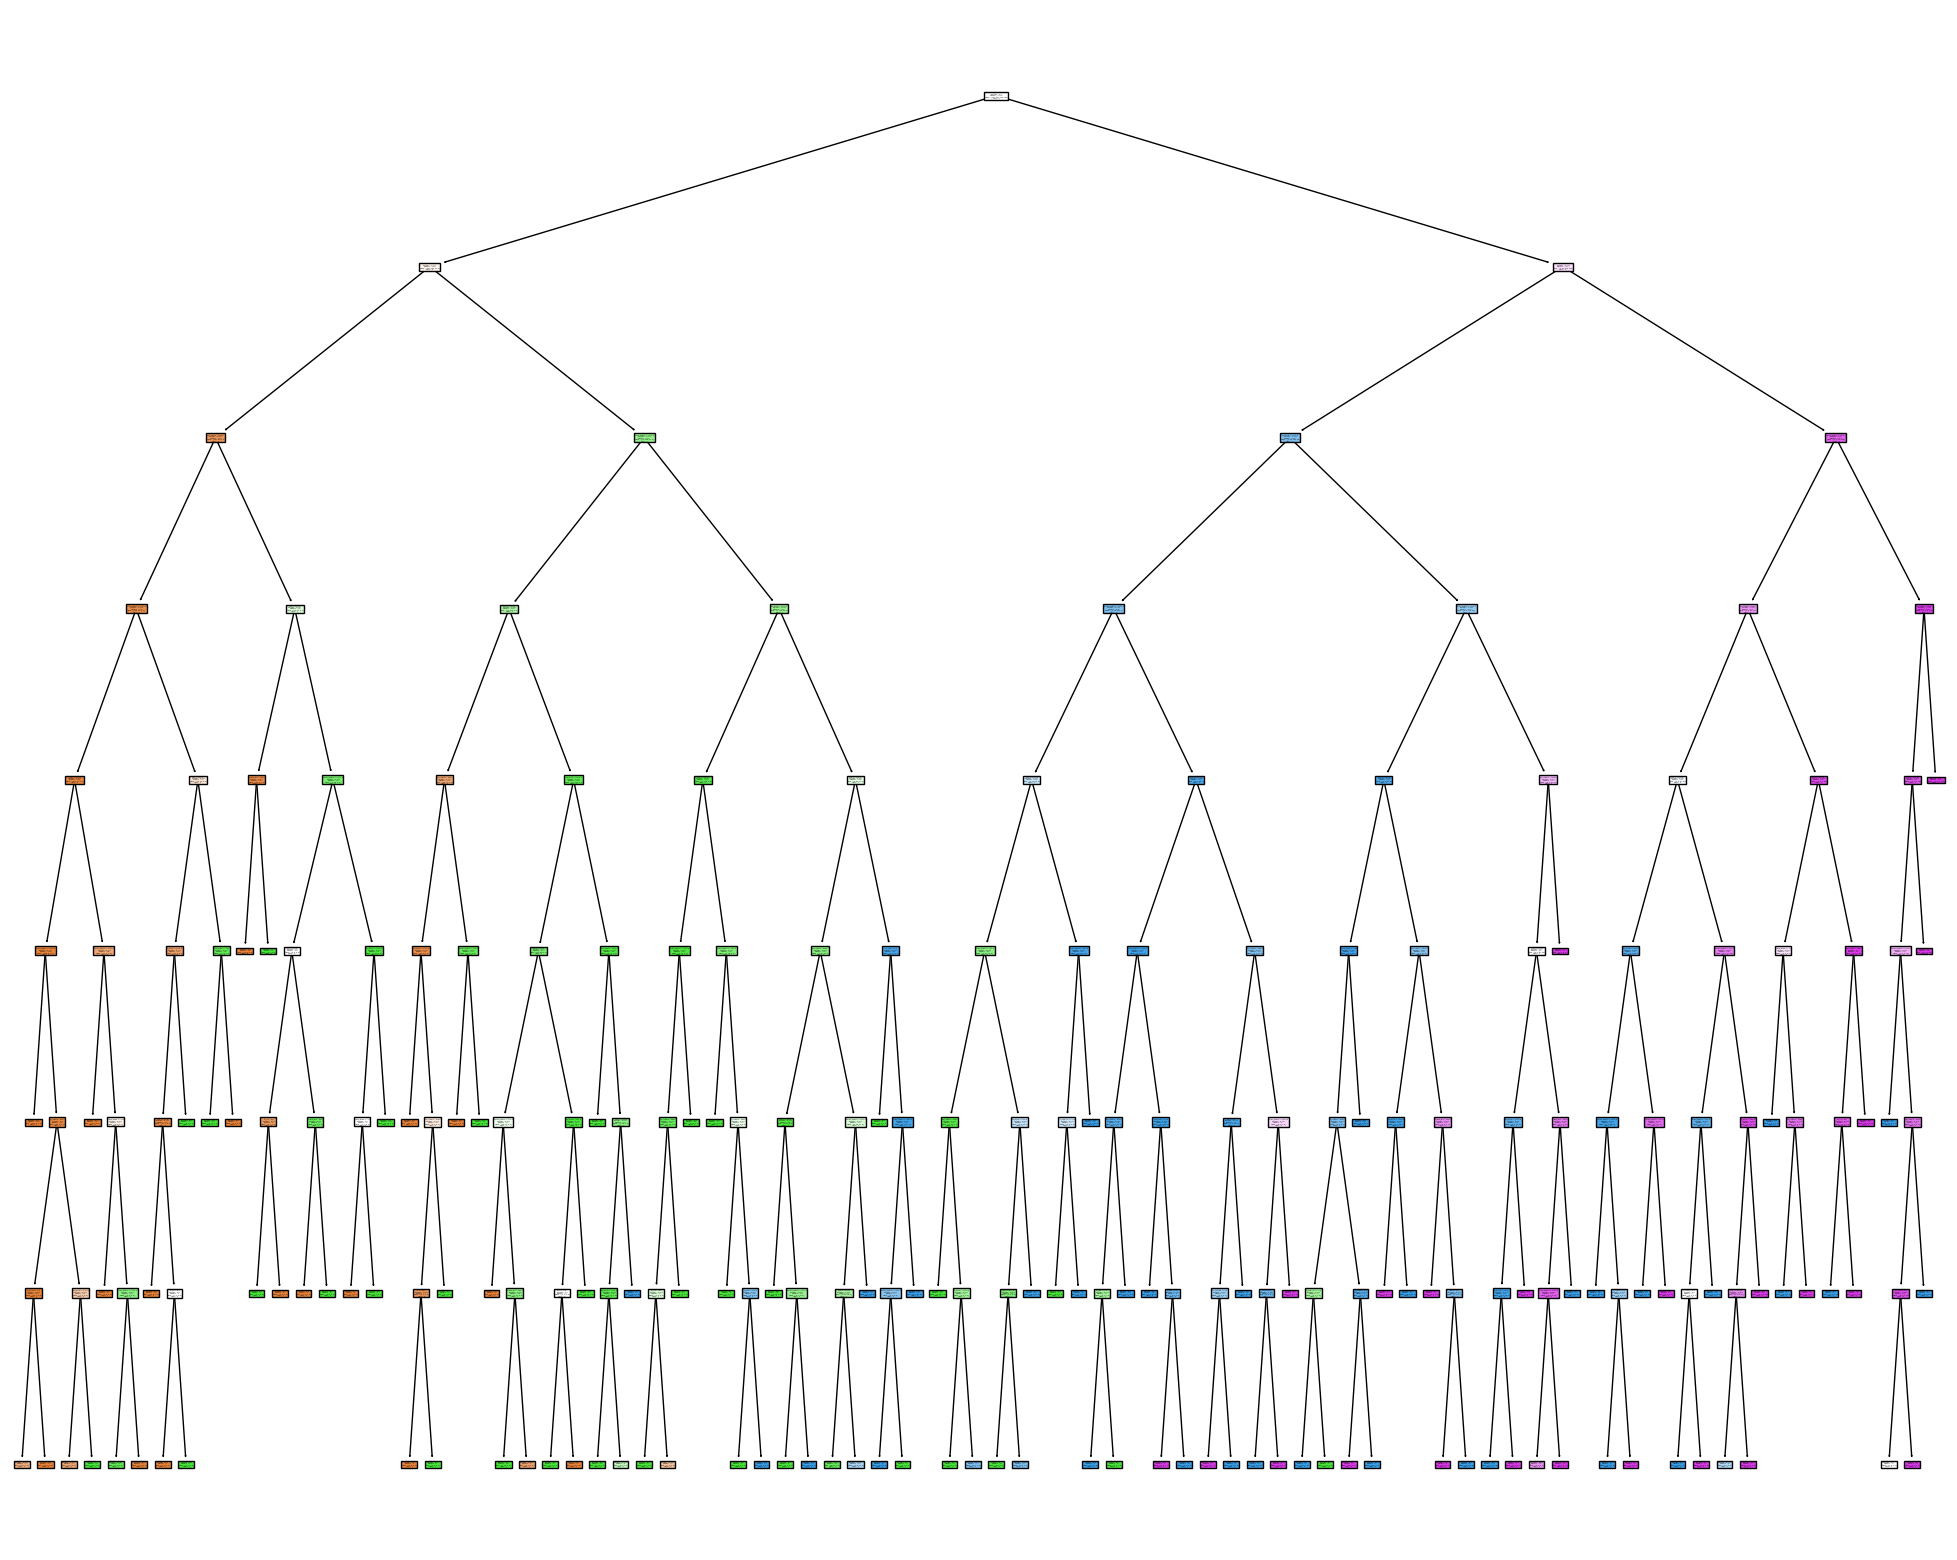

In [29]:
class_names = ['0', '1','2','3']
fig = plt.figure(figsize=(25,20))
plot = tree.plot_tree(dts ,
                     feature_names = feature_names,
                     class_names = class_names,
                     filled = True)
fig.savefig('tree1.png')

In [71]:
print(metrics.classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        59
           1       0.84      0.88      0.86        49
           2       0.80      0.80      0.80        45
           3       0.86      0.89      0.88        47

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200



In [72]:
metrics.confusion_matrix(y , dts.predict(x))

array([[477,  23,   0,   0],
       [ 12, 471,  17,   0],
       [  0,  24, 461,  15],
       [  0,   0,  17, 483]], dtype=int64)

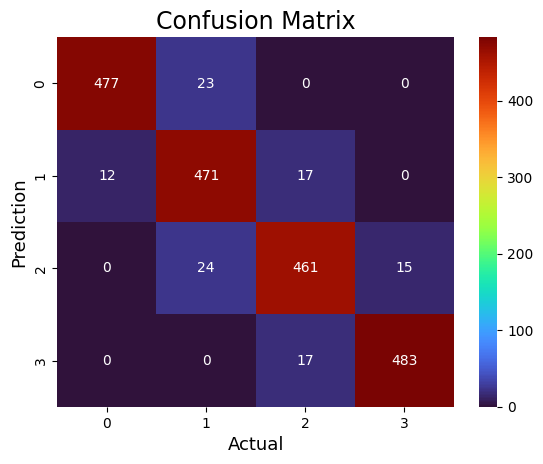

In [73]:
cm = metrics.confusion_matrix(y , dts.predict(x))
sns.heatmap(cm,
            annot=True,
            fmt='g',
            cmap="turbo",
            xticklabels=['0', '1', '2','3'],
            yticklabels=['0', '1', '2','3'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

# Random Forest Classifier

In [33]:
test_size = [0.1 , 0.15, 0.2 , 0.25 , 0.3 , 0.35]
random_state = [0 , 42]
dic = {'test_size' : [] ,'random state':[], 'accuracy' : []}
max_depth = [2,3,4,5,6,7,8,9]
for n in random_state:
    for i in test_size:
        x_train , x_test , y_train , y_test = train_test_split(x,y,test_size= i , random_state=n)
        rf = RandomForestClassifier()
        rf.fit(x_train , y_train.ravel())
        y_pred = rf.predict(x_test)
        dic["random state"].append(n)
        dic["test_size"].append(i)
        dic['accuracy'].append(metrics.accuracy_score(y_test , y_pred))   
besti = pd.DataFrame(dic)
print(besti.sort_values(by="accuracy", ascending=False))

    test_size  random state  accuracy
6        0.10            42  0.900000
8        0.20            42  0.900000
10       0.30            42  0.883333
11       0.35            42  0.881429
7        0.15            42  0.880000
0        0.10             0  0.875000
1        0.15             0  0.870000
3        0.25             0  0.870000
9        0.25            42  0.870000
2        0.20             0  0.865000
4        0.30             0  0.863333
5        0.35             0  0.852857


In [34]:
criterion = ['gini', 'entropy', 'log_loss']
dic = {'criterion' :[] ,'n_estimators':[], 'max depth':[] , 'accuracy' : []}
max_depth = [2,3,4,5,6,7,8,9]
n_estimators = [10,50,100,150,200,250,300]
for e in n_estimators:
    for j in criterion:
        for m in max_depth:
            x_train , x_test , y_train , y_test = train_test_split(x,y,test_size= 0.1 , random_state=42)
            rf = RandomForestClassifier(n_estimators=e ,criterion=j , max_depth=m)
            rf.fit(x_train , y_train.ravel())
            y_pred = rf.predict(x_test)
            dic['criterion'].append(j)
            dic['max depth'].append(m)
            dic['n_estimators'].append(e)
            dic['accuracy'].append(metrics.accuracy_score(y_test , y_pred))   
besti = pd.DataFrame(dic)
print(besti.sort_values(by="accuracy", ascending=False))

    criterion  n_estimators  max depth  accuracy
84    entropy           150          6     0.915
37    entropy            50          7     0.905
117  log_loss           200          7     0.905
47   log_loss            50          9     0.905
159   entropy           300          9     0.900
..        ...           ...        ...       ...
9     entropy            10          3     0.655
80    entropy           150          2     0.640
16   log_loss            10          2     0.615
40   log_loss            50          2     0.615
1        gini            10          3     0.590

[168 rows x 4 columns]


In [35]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size= 0.1 , random_state=42)
rf = RandomForestClassifier(n_estimators=100 ,criterion='log_loss' , max_depth=6)
rf.fit(x_train , y_train.ravel())
y_pred = rf.predict(x_test)

In [36]:
print('mean_absolute_error : ' , metrics.mean_absolute_error(y_test , y_pred))
print('mean_squared_error : ' , metrics.mean_squared_error(y_test , y_pred))
print('RMSE : ' ,np.sqrt(metrics.mean_squared_error(y_test , y_pred)) )
print('r2_score : ', metrics.r2_score(y_test , y_pred))
print ('accuracy :' , metrics.accuracy_score(y_test , y_pred))

mean_absolute_error :  0.12
mean_squared_error :  0.12
RMSE :  0.34641016151377546
r2_score :  0.9076923076923077
accuracy : 0.88


In [37]:
print(metrics.classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        59
           1       0.91      0.80      0.85        49
           2       0.82      0.80      0.81        45
           3       0.86      0.94      0.90        47

    accuracy                           0.88       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.88      0.88       200



In [38]:
metrics.confusion_matrix(y , rf.predict(x))

array([[497,   3,   0,   0],
       [ 21, 441,  38,   0],
       [  0,  43, 438,  19],
       [  0,   0,   5, 495]], dtype=int64)

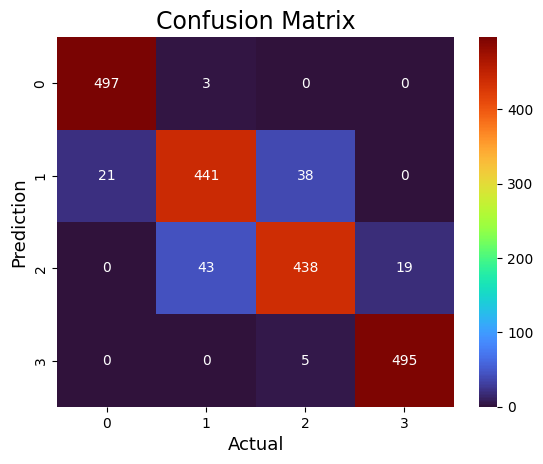

In [39]:
cm = metrics.confusion_matrix(y , rf.predict(x))
sns.heatmap(cm,
            annot=True,
            fmt='g',
            cmap="turbo",
            xticklabels=['0', '1', '2','3'],
            yticklabels=['0', '1', '2','3'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

# SVC

In [40]:
test_size = [0.1 , 0.15, 0.2 , 0.25 , 0.3 , 0.35]
random_state = [0 , 42]
dic = {'test_size' : [] ,'random state':[], 'accuracy' : []}
for n in random_state:
    for i in test_size:
        x_train , x_test , y_train , y_test = train_test_split(x,y,test_size= i , random_state=n)
        svc = SVC()
        svc.fit(x_train , y_train.ravel())
        y_pred = svc.predict(x_test)
        dic["random state"].append(n)
        dic["test_size"].append(i)
        dic['accuracy'].append(metrics.accuracy_score(y_test , y_pred))   
besti = pd.DataFrame(dic)
print(besti.sort_values(by="accuracy", ascending=False))

    test_size  random state  accuracy
7        0.15            42  0.970000
6        0.10            42  0.965000
8        0.20            42  0.965000
1        0.15             0  0.960000
11       0.35            42  0.960000
0        0.10             0  0.955000
2        0.20             0  0.955000
3        0.25             0  0.954000
10       0.30            42  0.953333
9        0.25            42  0.952000
5        0.35             0  0.948571
4        0.30             0  0.948333


In [41]:
x = df_train.drop('price_range',axis=1).values
y = df_train['price_range'].values.reshape(-1,1)

In [56]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
dic = {'kernel' :[] ,'gamma':[] , 'accuracy' : []}
gammas = ['scale', 'auto']
for e in gammas:
    for j in kernels:
        X_train , X_test , Y_train , Y_test = train_test_split(x,y,test_size= 0.15 , random_state=42)
        svc = SVC(gamma=e ,kernel=j )
        svc.fit(X_train , Y_train.ravel())
        y_pred = svc.predict(X_test)
        dic['kernel'].append(j)
        dic['gamma'].append(e)
        dic['accuracy'].append(metrics.accuracy_score(Y_test , y_pred))   
besti = pd.DataFrame(dic)
print(besti.sort_values(by="accuracy", ascending=False))

    kernel  gamma  accuracy
2      rbf  scale  0.970000
0   linear  scale  0.966667
4   linear   auto  0.966667
1     poly  scale  0.963333
5     poly   auto  0.963333
6      rbf   auto  0.226667
7  sigmoid   auto  0.226667
3  sigmoid  scale  0.173333


In [59]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size= 0.15 , random_state=42)
svc = SVC(gamma='scale' ,kernel='rbf')
svc.fit(x_train , y_train.ravel())
y_pred = svc.predict(x_test)

In [60]:
print('mean_absolute_error : ' , metrics.mean_absolute_error(y_test , y_pred))
print('mean_squared_error : ' , metrics.mean_squared_error(y_test , y_pred))
print('RMSE : ' ,np.sqrt(metrics.mean_squared_error(y_test , y_pred)) )
print('r2_score : ', metrics.r2_score(y_test , y_pred))
print ('accuracy :' , metrics.accuracy_score(y_test , y_pred))

mean_absolute_error :  0.03
mean_squared_error :  0.03
RMSE :  0.17320508075688773
r2_score :  0.9772144207399406
accuracy : 0.97


In [61]:
print(metrics.classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        80
           1       0.95      0.99      0.97        72
           2       0.96      0.96      0.96        68
           3       0.99      0.96      0.97        80

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [62]:
metrics.confusion_matrix(y , svc.predict(x))

array([[492,   8,   0,   0],
       [ 16, 478,   6,   0],
       [  0,  25, 457,  18],
       [  0,   0,  18, 482]], dtype=int64)

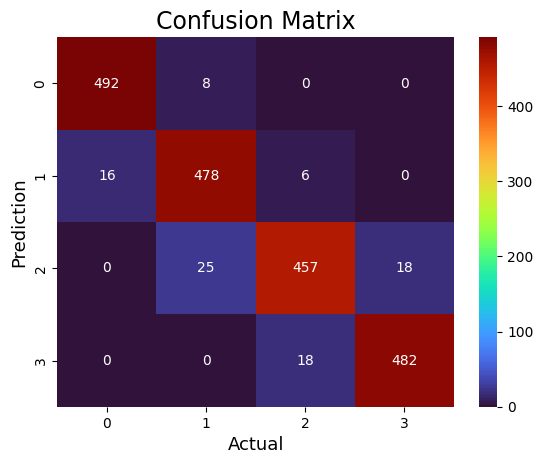

In [63]:
cm = metrics.confusion_matrix(y , svc.predict(x))
sns.heatmap(cm,
            annot=True,
            fmt='g',
            cmap="turbo",
            xticklabels=['0', '1', '2','3'],
            yticklabels=['0', '1', '2','3'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()